# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Начнем с импорта Pandas, просмотра таблицы и нформации по ней

In [1]:
import pandas as pd
yandex_flats = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(yandex_flats.head())
print()
print(yandex_flats.info())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

Столбцы, которые рисутствуют в базе данных:

total_images — число фотографий квартиры в объявлении

last_price — цена на момент снятия с публикации

total_area — площадь квартиры в квадратных метрах (м²)

first_day_exposition — дата публикации

rooms — число комнат

ceiling_height — высота потолков (м)

floors_total — всего этажей в доме

living_area — жилая площадь в квадратных метрах(м²)

floor — этаж

is_apartment — апартаменты (булев тип)

studio — квартира-студия (булев тип)

open_plan — свободная планировка (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

balcony — число балконов

locality_name — название населённого пункта

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

cityCenters_nearest — расстояние до центра города (м)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

Начнем поэтапно избавляться от пропусков и некорректный типов данных
Стартуем с типа. Под замену:



first_day_exposition    object to_datatime

is_apartment            object ???? нужно подумать
locality_name           23650 ???? нужно подумать

balcony                 float64 есть шанс что bool. Нужно посмотреть. если нет, то int точно 

floors_total            float64 в int64
last_price              float64 в int64
airports_nearest        float64 в int64
cityCenters_nearest     float64 в int64
parks_around3000        float64 в int64
parks_nearest           float64 в int64
ponds_around3000        float64 в int64
ponds_nearest           float64 в int64
days_exposition         float64 в int64
    

In [2]:
print(yandex_flats['is_apartment'].unique())

[nan False True]


На данном этапе не представляю что можно сделать со столбцом "is_apartment"
Есть у меня мнение, что заполнявшие эти данные подразумевали под аппартаментами совершенно разное
Посмотрим позже, может, он нам и не пригодится. 

In [3]:
yandex_flats[yandex_flats['locality_name'] == 'посёлок Усть-Луга']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3608,15,1200000.0,33.0,2019-01-05T00:00:00,1,NaN,2.0,16.5,2,NaN,...,7.0,NaN,посёлок Усть-Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8809,10,1850000.0,53.7,2018-07-12T00:00:00,2,NaN,5.0,29.7,1,NaN,...,NaN,1.0,посёлок Усть-Луга,NaN,NaN,NaN,NaN,NaN,NaN,276.0
11000,7,2150000.0,36.0,2017-04-25T00:00:00,1,NaN,5.0,17.5,2,False,...,8.6,2.0,посёлок Усть-Луга,NaN,NaN,NaN,NaN,NaN,NaN,45.0
14101,8,1320000.0,32.6,2017-06-05T00:00:00,1,NaN,5.0,18.2,1,False,...,5.8,1.0,посёлок Усть-Луга,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [4]:
print(len(yandex_flats['locality_name'].unique()))
print(yandex_flats['locality_name'].unique())

365
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый

In [5]:
yandex_flats.groupby('locality_name')['locality_name'].count().sort_values().head(50)

locality_name
поселок Жилгородок                    1
деревня Тойворово                     1
деревня Трубников Бор                 1
деревня Хапо-Ое                       1
деревня Хязельки                      1
деревня Чудской Бор                   1
деревня Шпаньково                     1
деревня Щеглово                       1
деревня Ялгино                        1
коттеджный поселок Кивеннапа Север    1
коттеджный поселок Счастье            1
коттеджный посёлок Лесное             1
поселок Возрождение                   1
поселок Володарское                   1
поселок Гаврилово                     1
поселок Гладкое                       1
поселок Гончарово                     1
поселок Дружноселье                   1
поселок Жилпосёлок                    1
поселок Калитино                      1
деревня Тихковицы                     1
поселок Каложицы                      1
деревня Терпилицы                     1
деревня Снегирёвка                    1
деревня Куровицы          

А вот с "locality_name" нужно будет поработать очень плотно. Даже с первого взгляда, повторений с десяток, не меньше
глянем, что в "балконах":


In [6]:
print(yandex_flats['balcony'].unique())

[nan  2.  0.  1.  5.  4.  3.]


Многовато вариантов для bool. Будем менять на int со всеми остальными, но до этого предположим что все незаполненные балконы - это их отсутствие. Но для начала, глянем их количество

In [7]:
yandex_flats.pivot_table(index='balcony', values='total_images', aggfunc='count')

,total_images
balcony,
0.0,3758
1.0,4195
2.0,3659
3.0,81
4.0,183
5.0,304


Хм, странно, без балконов столько же, объектов как и с двумя балконами. Глупость. Можно было бы принять нан за 0, но есть шанс потом поплатиться. Поэтому во всех столбцах, где есть пропуски, заменим Nan на "-1" и переведем в int, а дальше посмотрим. 

balcony                 float64 в int64
floors_total            float64 в int64
last_price              float64 в int64
airports_nearest        float64 в int64
cityCenters_nearest     float64 в int64
parks_around3000        float64 в int64
parks_nearest           float64 в int64
ponds_around3000        float64 в int64
ponds_nearest           float64 в int64
days_exposition         float64 в int64
    
Ни в одном из столбцов не, по логике, не может быть отрицательных значений, но это, все же, стоит проверить:

In [8]:
to_int_columns = ['balcony', 'floors_total', 'last_price', 'airports_nearest'
                  , 'cityCenters_nearest', 'parks_around3000', 'parks_nearest'
                  , 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for i in to_int_columns:
    a = yandex_flats[i].unique()
    b = 0
    for j in a:
        if j < 0:
            b += 1
    print('Отрицательных значений в',i,b)        


Отрицательных значений в balcony 0
Отрицательных значений в floors_total 0
Отрицательных значений в last_price 0
Отрицательных значений в airports_nearest 0
Отрицательных значений в cityCenters_nearest 0
Отрицательных значений в parks_around3000 0
Отрицательных значений в parks_nearest 0
Отрицательных значений в ponds_around3000 0
Отрицательных значений в ponds_nearest 0
Отрицательных значений в days_exposition 0


Отлично, значит для перевода всех столбцов в INT без ошибок, заменим Nan на "-1"

изначально, следующий абзац был кодом, но пересматрвать все заполненные столбцы оказалось сложно

to_int_columns = ['balcony', 'floors_total', 'last_price', 'airports_nearest'
                  , 'cityCenters_nearest', 'parks_around3000', 'parks_nearest'
                  , 'ponds_around3000', 'ponds_nearest', 'days_exposition']
print(yandex_flats.info())
print()
for i in to_int_columns:        
    yandex_flats[i] = yandex_flats[i].fillna(-1)
    yandex_flats[i] = yandex_flats[i].astype('int')    
    
print(yandex_flats.info())    

Выглядит чуть красивее, но это только выглядит. На самом деле, кроме потребления памяти и заполненных бесполезной "-1" Nan-ов ничего не изменилось. Приведем first_day_exposition в человеческий вид

In [9]:
print(yandex_flats['first_day_exposition'][0:5])

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object


In [10]:
yandex_flats['first_day_exposition'] = pd.to_datetime(yandex_flats['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
print(yandex_flats['first_day_exposition'][0:5])

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


Ну вот совсем другое дело!




first_day_exposition    object to_datatime


balcony                 float64 есть шанс что bool. Нужно посмотреть. если нет, то int точно 

floors_total            float64 в int64
last_price              float64 в int64
airports_nearest        float64 в int64
cityCenters_nearest     float64 в int64
parks_around3000        float64 в int64
parks_nearest           float64 в int64
ponds_around3000        float64 в int64
ponds_nearest           float64 в int64
days_exposition         float64 в int64
    

In [11]:
yandex_flats['last_price'] = yandex_flats['last_price'].astype('int')
print(yandex_flats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_aro

### Вывод

На этом беглый осмотр столбцов завершен. 
Слишком много пропущеннх данных
Типы данных были совсем некорректными
Необходимо свериться с заданием и проверить есть ли необходимость во всех этих столбах. Есть у меня мнение, что половину из них можно запросто удалить. 
Но, для практики сделаем это только после того, как "обработаем данные"
Вперед!


### Шаг 2. Предобработка данных

Постепеннь будем двигаться по каждому отдельному столбцу, приводя данные к идеальным
Начнем с total_images

In [12]:
yandex_flats['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

Буду честен, количество фотографий не влияет на покупку квартиры и ее цену
Отсутствие фотографий может быть пунктом, по которому люди могут судить о квартире, а вот количество, вряд ли
Поэтому изменим тип данных на булев, где False - отсутствие фотографий, а True их наличие

In [13]:
yandex_flats['total_images'] = yandex_flats['total_images'].astype('bool')
yandex_flats['total_images'].unique()

array([ True, False])

Другое дело!

In [124]:
yandex_flats.pivot_table(index='ceiling_height', values='total_images', aggfunc='count').head(20)

,total_images
ceiling_height,
0.00,9160
1.00,1
1.20,1
1.75,1
2.00,11
2.20,1
2.25,1
2.30,4
2.34,1


До 2.5 метров квартир совсем немного.будем убирать

In [15]:
ceiling_height = yandex_flats.pivot_table(index='ceiling_height', values='total_images', aggfunc='count').sort_values(by='total_images', ascending=False)
ceiling_height

,total_images
ceiling_height,
2.50,3515
2.60,1646
2.70,1574
3.00,1112
2.80,993
...,...
3.88,1
3.93,1
3.98,1


183 различных по высоте потолков! Неслабо
23699 объектов всего, 1% = 24 объекта.
Значит категорией от 70 объектов мы уже не можем жертвовать



In [16]:
ceiling_height.head(30)

,total_images
ceiling_height,
2.50,3515
2.60,1646
2.70,1574
3.00,1112
2.80,993
2.55,980
2.75,910
2.65,676
3.20,277


Отсюда получается, что у нас будет 21 группа объектов по высоте потолков:

In [17]:
ceiling_height.head(21).sort_values(by='ceiling_height')

,total_images
ceiling_height,
2.50,3515
2.52,79
2.53,67
2.54,83
2.55,980
2.56,139
2.57,103
2.60,1646
2.64,81


Очень странно выглядит категория 2,64 метра рядом с 2,6
Думаю, смело можно брать следующие значения:
    2.5
    2.55
    2.6
    2.65
    2.7
    2.75
    2.8
    2.85
    2.9
    3
    3.1
    3.2
    3.3
    3.4
    3.5
    
15 категорий. Приемлимо, как по мне

In [18]:
yandex_flats['ceiling_height_grouped'] = yandex_flats['ceiling_height']

In [19]:
def ceiling_height_grouped(high):
    if high < 2.55:
        return 2.5
    elif high < 2.6:
        return 2.55
    elif high < 2.65:
        return 2.6
    elif high < 2.7:
        return 2.65    
    elif high < 2.75:
        return 2.7  
    elif high < 2.8:
        return 2.75
    elif high < 2.85:
        return 2.8 
    elif high < 2.9:
        return 2.85    
    elif high < 3:
        return 2.9    
    elif high < 3.1:
        return 3    
    elif high < 3.2:
        return 3.1    
    elif high < 3.3:
        return 3.2    
    elif high < 3.4:
        return 3.3    
    elif high < 3.5:
        return 3.4
    elif high >= 3.5:
        return 3.5

    else:
        return high     

yandex_flats['ceiling_height_grouped'] = yandex_flats['ceiling_height'].apply(ceiling_height_grouped)

len(yandex_flats['ceiling_height_grouped'].unique())



16

In [20]:
yandex_flats[yandex_flats['ceiling_height_grouped'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_grouped
1,True,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,NaN
2,True,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,NaN
3,False,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
5,True,2890000,30.4,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN
6,True,3700000,37.3,2017-11-02,1,NaN,26.0,10.6,6,NaN,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,True,3200000,39.0,2017-12-16,1,NaN,9.0,20.0,6,NaN,...,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0,NaN
23690,True,5500000,52.0,2018-07-19,2,NaN,5.0,31.0,2,NaN,...,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,NaN
23692,True,1350000,30.0,2017-07-07,1,NaN,5.0,17.5,4,NaN,...,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,NaN
23695,True,3100000,59.0,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN


9195 пропущенных значений высоты потолков
Можно было бы заполнить, если бы мы знали год постройки объектов, но т.к. нам это неизвестно, оставим 9159 пустых строк.
А точннее, подставим вместо отсутствующих значений 0

In [22]:
yandex_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images              23699 non-null bool
last_price                23699 non-null int64
total_area                23699 non-null float64
first_day_exposition      23699 non-null datetime64[ns]
rooms                     23699 non-null int64
ceiling_height            23699 non-null float64
floors_total              23613 non-null float64
living_area               21796 non-null float64
floor                     23699 non-null int64
is_apartment              2775 non-null object
studio                    23699 non-null bool
open_plan                 23699 non-null bool
kitchen_area              21421 non-null float64
balcony                   12180 non-null float64
locality_name             23650 non-null object
airports_nearest          18157 non-null float64
cityCenters_nearest       18180 non-null float64
parks_around3000          18181 non-null float64
parks_nearest       

In [23]:
sorted(yandex_flats['living_area'].unique())[:10]

[2.0, 3.0, 9.0, 10.0, 10.6, 12.3, 12.7, 13.0, 14.0, 14.4]

In [24]:
living_area_nan = yandex_flats[yandex_flats['living_area'].isnull()]

1903 пустых строк
living_area будет напрямую зависеть от количества комнат, в большинстве случаев, поэтому можем сгруппировать таблицу и оценить среднюю living_area

In [25]:
living_area_rooms = yandex_flats.pivot_table(index='rooms', values='living_area', aggfunc=['median','count'])
living_area_rooms

,median,count
,living_area,living_area
rooms,,
0,18.000,183
1,17.600,7388
2,30.500,7296
3,45.000,5366
4,63.600,1089
5,91.785,292
6,123.900,99
7,145.000,53


Странно, с 0 комнат 18 кв.м площадь. Вернемся к ним позже. А до этого, заполним living_area исходя из living_area_rooms
Однако, living_area будет так же напрямую зависеть и от общей площади. Для начала проверим соотношение общей площади и жилой у всех объектов, которые у нас есть

In [26]:
yandex_flats['area_ratio'] = yandex_flats['living_area']/yandex_flats['total_area']
yandex_flats.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_grouped,area_ratio
0,True,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2.70,0.472222
1,True,3350000,40.40,2018-12-04,1,0.00,11.0,18.60,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.00,0.460396
2,True,5196000,56.00,2015-08-20,2,0.00,5.0,34.30,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.00,0.612500
3,False,64900000,159.00,2015-07-24,3,0.00,14.0,NaN,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.00,NaN
4,True,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,3.00,0.320000
5,True,2890000,30.40,2018-09-10,1,0.00,12.0,14.40,5,NaN,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.00,0.473684
6,True,3700000,37.30,2017-11-02,1,0.00,26.0,10.60,6,NaN,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0.00,0.284182
7,True,7915000,71.60,2019-04-18,2,0.00,24.0,NaN,22,NaN,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,0.00,NaN
8,True,2900000,33.16,2018-05-23,1,0.00,27.0,15.43,26,NaN,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.00,0.465320
9,True,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,2.50,0.714754


In [27]:
min(yandex_flats['area_ratio'])

0.02158273381294964

In [28]:
max(yandex_flats['area_ratio'])

1.0

Значения столбца отношений площади от 2% до 100%
давайте посмотрим на медианное значение отношения по количеству комнат

Вот это мне нравится больше. Теперь исходя из количества комнат найдем и соотношения площадей заполним недостающие данные

In [29]:
yandex_flats.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_grouped,area_ratio
0,True,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,2.7,0.472222
1,True,3350000,40.40,2018-12-04,1,0.00,11.0,18.60,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.0,0.460396
2,True,5196000,56.00,2015-08-20,2,0.00,5.0,34.30,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.0,0.612500
3,False,64900000,159.00,2015-07-24,3,0.00,14.0,NaN,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.0,NaN
4,True,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,3.0,0.320000
5,True,2890000,30.40,2018-09-10,1,0.00,12.0,14.40,5,NaN,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.0,0.473684
6,True,3700000,37.30,2017-11-02,1,0.00,26.0,10.60,6,NaN,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0.0,0.284182
7,True,7915000,71.60,2019-04-18,2,0.00,24.0,NaN,22,NaN,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN
8,True,2900000,33.16,2018-05-23,1,0.00,27.0,15.43,26,NaN,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.0,0.465320
9,True,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,2.5,0.714754


In [30]:
area_ratio_rooms = yandex_flats.groupby('rooms')['area_ratio'].median().to_dict()

yandex_flats['area_ratio'] = yandex_flats['area_ratio'].fillna(-1)

def add_area(row):
    if row['area_ratio'] == -1:
        return area_ratio_rooms[row['rooms']]
    return row['area_ratio']

yandex_flats['area_ratio'] = yandex_flats.apply(add_area, axis=1)    


yandex_flats['living_area'] = yandex_flats['total_area'] * yandex_flats['area_ratio']
yandex_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images              23699 non-null bool
last_price                23699 non-null int64
total_area                23699 non-null float64
first_day_exposition      23699 non-null datetime64[ns]
rooms                     23699 non-null int64
ceiling_height            23699 non-null float64
floors_total              23613 non-null float64
living_area               23699 non-null float64
floor                     23699 non-null int64
is_apartment              2775 non-null object
studio                    23699 non-null bool
open_plan                 23699 non-null bool
kitchen_area              21421 non-null float64
balcony                   12180 non-null float64
locality_name             23650 non-null object
airports_nearest          18157 non-null float64
cityCenters_nearest       18180 non-null float64
parks_around3000          18181 non-null float64
parks_nearest       

Переходим к balcony

In [31]:
yandex_flats['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [32]:
yandex_flats['balcony'] = yandex_flats['balcony'].fillna(-1)

In [33]:
yandex_flats.groupby('balcony')['balcony'].count()

balcony
-1.0    11519
 0.0     3758
 1.0     4195
 2.0     3659
 3.0       81
 4.0      183
 5.0      304
Name: balcony, dtype: int64

11 тысяч незаполненных балконов. Как сказано в задании
"Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0."
Но примернно половина (данных я не нашел, однако подсчет соседних домов дал такой результат) квартир, по-моему комплектуется балконом.
Однако, раз сказано, давайте заменять

In [34]:
for i in range(len(yandex_flats)):
    if yandex_flats['balcony'][i] == -1:
        yandex_flats.loc[i, 'balcony'] = 0

In [35]:
yandex_flats.groupby('balcony')['balcony'].count()

balcony
0.0    15277
1.0     4195
2.0     3659
3.0       81
4.0      183
5.0      304
Name: balcony, dtype: int64

In [36]:
yandex_flats['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [37]:
yandex_flats.groupby('is_apartment')['is_apartment'].count()

is_apartment
False    2725
True       50
Name: is_apartment, dtype: int64

Можно предположить, что незаполненные данные - это ответ "нет" пользователя, поэтому заполним все Нан

In [38]:
yandex_flats['is_apartment'] = yandex_flats['is_apartment'].fillna(False)
yandex_flats['is_apartment'] = yandex_flats['is_apartment'].astype('bool')
yandex_flats.groupby('is_apartment')['is_apartment'].count()

yandex_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images              23699 non-null bool
last_price                23699 non-null int64
total_area                23699 non-null float64
first_day_exposition      23699 non-null datetime64[ns]
rooms                     23699 non-null int64
ceiling_height            23699 non-null float64
floors_total              23613 non-null float64
living_area               23699 non-null float64
floor                     23699 non-null int64
is_apartment              23699 non-null bool
studio                    23699 non-null bool
open_plan                 23699 non-null bool
kitchen_area              21421 non-null float64
balcony                   23699 non-null float64
locality_name             23650 non-null object
airports_nearest          18157 non-null float64
cityCenters_nearest       18180 non-null float64
parks_around3000          18181 non-null float64
parks_nearest        

Заполнять кухонные пропуски будем по тому же методу, что и пропуски в жилой площади

In [39]:
yandex_flats['kitchen_area_ratio'] = yandex_flats['kitchen_area'] / yandex_flats['total_area']
yandex_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
total_images              23699 non-null bool
last_price                23699 non-null int64
total_area                23699 non-null float64
first_day_exposition      23699 non-null datetime64[ns]
rooms                     23699 non-null int64
ceiling_height            23699 non-null float64
floors_total              23613 non-null float64
living_area               23699 non-null float64
floor                     23699 non-null int64
is_apartment              23699 non-null bool
studio                    23699 non-null bool
open_plan                 23699 non-null bool
kitchen_area              21421 non-null float64
balcony                   23699 non-null float64
locality_name             23650 non-null object
airports_nearest          18157 non-null float64
cityCenters_nearest       18180 non-null float64
parks_around3000          18181 non-null float64
parks_nearest        

In [40]:
dict_room_kitchen = yandex_flats.groupby('rooms')['kitchen_area_ratio'].median().to_dict()
dict_room_kitchen

{0: nan,
 1: 0.24783861671469737,
 2: 0.16107509732624672,
 3: 0.12857142857142856,
 4: 0.11224489795918367,
 5: 0.10538641686182669,
 6: 0.09950248756218906,
 7: 0.08371748607663587,
 8: 0.1091703056768559,
 9: 0.04961984793917567,
 10: 0.09162424803331791,
 11: 0.0668546285257222,
 12: 0.12444444444444444,
 14: 0.07563599991917395,
 15: 0.1694915254237288,
 16: 0.04814814814814815,
 19: 0.07367859049652963}

In [41]:
yandex_flats['kitchen_area_ratio'] = yandex_flats['kitchen_area_ratio'].fillna(-1)
yandex_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
total_images              23699 non-null bool
last_price                23699 non-null int64
total_area                23699 non-null float64
first_day_exposition      23699 non-null datetime64[ns]
rooms                     23699 non-null int64
ceiling_height            23699 non-null float64
floors_total              23613 non-null float64
living_area               23699 non-null float64
floor                     23699 non-null int64
is_apartment              23699 non-null bool
studio                    23699 non-null bool
open_plan                 23699 non-null bool
kitchen_area              21421 non-null float64
balcony                   23699 non-null float64
locality_name             23650 non-null object
airports_nearest          18157 non-null float64
cityCenters_nearest       18180 non-null float64
parks_around3000          18181 non-null float64
parks_nearest        

In [42]:
def kitchen(row):
    if row['kitchen_area_ratio'] == -1:
        return dict_room_kitchen[row['rooms']]
    return row['kitchen_area_ratio']

yandex_flats['kitchen_area_ratio'] = yandex_flats.apply(kitchen, axis=1)

In [43]:
yandex_flats[yandex_flats['kitchen_area_ratio'].isnull()].groupby('rooms')['rooms'].count()

rooms
0    197
Name: rooms, dtype: int64

из-за отсутствия информации по комнатам отсутствует и информация по площади кухни


In [44]:
yandex_flats[yandex_flats['kitchen_area_ratio'].isnull()].groupby('total_area')['total_area'].count()

total_area
15.5     1
16.0     1
17.0     1
18.0     1
18.8     1
        ..
58.4     1
71.0     1
73.6     1
98.4     1
371.0    1
Name: total_area, Length: 103, dtype: int64

есть теоретическая возможность, что это помещения без кухонь, поэтому поставим вместо nan "0"

In [45]:
yandex_flats['kitchen_area_ratio'] = yandex_flats['kitchen_area_ratio'].fillna(0)
yandex_flats['kitchen_area'] = yandex_flats['kitchen_area_ratio']*yandex_flats['total_area']
yandex_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
total_images              23699 non-null bool
last_price                23699 non-null int64
total_area                23699 non-null float64
first_day_exposition      23699 non-null datetime64[ns]
rooms                     23699 non-null int64
ceiling_height            23699 non-null float64
floors_total              23613 non-null float64
living_area               23699 non-null float64
floor                     23699 non-null int64
is_apartment              23699 non-null bool
studio                    23699 non-null bool
open_plan                 23699 non-null bool
kitchen_area              23699 non-null float64
balcony                   23699 non-null float64
locality_name             23650 non-null object
airports_nearest          18157 non-null float64
cityCenters_nearest       18180 non-null float64
parks_around3000          18181 non-null float64
parks_nearest        

In [46]:
yandex_flats[yandex_flats['kitchen_area_ratio']==-1].groupby('rooms')['kitchen_area_ratio'].median().to_dict()

{}

Переходим к locality_name

In [47]:
print(len(yandex_flats['locality_name'].unique()))

365


In [48]:
yandex_flats = yandex_flats.dropna(subset=['locality_name']).reset_index(drop=True)
yandex_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 25 columns):
total_images              23650 non-null bool
last_price                23650 non-null int64
total_area                23650 non-null float64
first_day_exposition      23650 non-null datetime64[ns]
rooms                     23650 non-null int64
ceiling_height            23650 non-null float64
floors_total              23565 non-null float64
living_area               23650 non-null float64
floor                     23650 non-null int64
is_apartment              23650 non-null bool
studio                    23650 non-null bool
open_plan                 23650 non-null bool
kitchen_area              23650 non-null float64
balcony                   23650 non-null float64
locality_name             23650 non-null object
airports_nearest          18116 non-null float64
cityCenters_nearest       18139 non-null float64
parks_around3000          18140 non-null float64
parks_nearest        

In [49]:
yandex_flats['locality_name'] = yandex_flats['locality_name'].fillna(-1)

def big_letter(name):
    name = str(name)
    for i in name:
        if i.isupper():
            return name[name.index(i):]
        

yandex_flats.loc[:,'locality_name'] = yandex_flats.loc[:,'locality_name'].apply(big_letter)  
yandex_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 25 columns):
total_images              23650 non-null bool
last_price                23650 non-null int64
total_area                23650 non-null float64
first_day_exposition      23650 non-null datetime64[ns]
rooms                     23650 non-null int64
ceiling_height            23650 non-null float64
floors_total              23565 non-null float64
living_area               23650 non-null float64
floor                     23650 non-null int64
is_apartment              23650 non-null bool
studio                    23650 non-null bool
open_plan                 23650 non-null bool
kitchen_area              23650 non-null float64
balcony                   23650 non-null float64
locality_name             23650 non-null object
airports_nearest          18116 non-null float64
cityCenters_nearest       18139 non-null float64
parks_around3000          18140 non-null float64
parks_nearest        

In [50]:
len(yandex_flats['locality_name'].unique())

305

In [51]:
yandex_flats[yandex_flats['floors_total'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_grouped,area_ratio,kitchen_area_ratio
186,True,11640000,65.2,2018-10-02,2,0.0,NaN,30.800000,4,False,...,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0,0.0,0.472393,0.184049
237,True,2438033,28.1,2016-11-23,1,0.0,NaN,20.750000,1,False,...,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,0.0,0.738434,0.247839
457,True,9788348,70.8,2015-08-01,2,0.0,NaN,38.400000,12,False,...,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,0.0,0.542373,0.150141
671,True,6051191,93.6,2017-04-06,3,0.0,NaN,47.100000,8,False,...,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0,0.0,0.503205,0.179487
1756,True,3600000,39.0,2017-04-22,1,0.0,NaN,18.817032,9,False,...,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0,0.0,0.482488,0.247839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22496,True,8500000,63.5,2017-05-24,2,2.8,NaN,37.148080,3,False,...,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0,2.8,0.585009,0.161075
22610,True,4574160,64.5,2017-04-02,2,0.0,NaN,31.700000,20,False,...,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0,0.0,0.491473,0.223256
22761,False,14569263,110.4,2016-11-20,3,0.0,NaN,45.380000,6,False,...,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0,0.0,0.411051,0.212138
23541,False,21187872,123.3,2017-04-25,3,0.0,NaN,50.400000,18,False,...,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0,0.0,0.408759,0.191403


85 квартир с незаполненными обзими этажами. Заполним их этажами, которые указаны в самих квартирах

In [52]:
yandex_flats.loc[:, 'floors_total'] = yandex_flats.loc[:, 'floors_total'].fillna(-1)

for j in range(len(yandex_flats)):
    if yandex_flats['floors_total'][j] == -1:
        yandex_flats.loc[j, 'floors_total'] = yandex_flats.loc[j, 'floor']


In [53]:
yandex_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 25 columns):
total_images              23650 non-null bool
last_price                23650 non-null int64
total_area                23650 non-null float64
first_day_exposition      23650 non-null datetime64[ns]
rooms                     23650 non-null int64
ceiling_height            23650 non-null float64
floors_total              23650 non-null float64
living_area               23650 non-null float64
floor                     23650 non-null int64
is_apartment              23650 non-null bool
studio                    23650 non-null bool
open_plan                 23650 non-null bool
kitchen_area              23650 non-null float64
balcony                   23650 non-null float64
locality_name             23650 non-null object
airports_nearest          18116 non-null float64
cityCenters_nearest       18139 non-null float64
parks_around3000          18140 non-null float64
parks_nearest        

In [54]:
yandex_flats['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [55]:
yandex_flats['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

можно предположить, что при наличии парков и водоемов, эта информация была бы указана, поэтому можно заменить все nan на "0"

In [56]:
yandex_flats['parks_around3000'] = yandex_flats['parks_around3000'].fillna(0)
yandex_flats['ponds_around3000'] = yandex_flats['ponds_around3000'].fillna(0)
yandex_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 25 columns):
total_images              23650 non-null bool
last_price                23650 non-null int64
total_area                23650 non-null float64
first_day_exposition      23650 non-null datetime64[ns]
rooms                     23650 non-null int64
ceiling_height            23650 non-null float64
floors_total              23650 non-null float64
living_area               23650 non-null float64
floor                     23650 non-null int64
is_apartment              23650 non-null bool
studio                    23650 non-null bool
open_plan                 23650 non-null bool
kitchen_area              23650 non-null float64
balcony                   23650 non-null float64
locality_name             23650 non-null object
airports_nearest          18116 non-null float64
cityCenters_nearest       18139 non-null float64
parks_around3000          23650 non-null float64
parks_nearest        

In [57]:
len(yandex_flats[yandex_flats['ponds_around3000'] > 0])

9085

In [58]:
len(yandex_flats[yandex_flats['parks_around3000'] > 0])

8060

А зпаолненных parks_nearest 8064, странно

In [59]:
yandex_flats[(yandex_flats['parks_around3000'] == 0) & (yandex_flats['parks_nearest'] > 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_grouped,area_ratio,kitchen_area_ratio
1589,True,7500000,70.0,2017-07-11,2,0.0,18.0,37.0,13,False,...,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0,0.0,0.528571,0.142857
10941,True,3000000,31.1,2017-03-21,1,0.0,5.0,17.7,2,False,...,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0,0.0,0.569132,0.176849
19173,True,14950000,187.0,2017-10-12,5,3.0,2.0,80.0,2,False,...,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0,3.0,0.427807,0.090909
19395,True,3900000,30.5,2018-02-22,1,2.6,5.0,16.5,1,False,...,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0,2.6,0.540984,0.180328


Вот они те 4 объекта, в которых расстояние до парка указано, а парка ближе 3км нет)
Заполним parks_nearest и ponds_nearest значениями "-1", чтобы можно было их идентифицировать

In [60]:
yandex_flats['ponds_nearest'] = yandex_flats['ponds_nearest'].fillna(-1)
yandex_flats['parks_nearest'] = yandex_flats['parks_nearest'].fillna(-1)

In [61]:
yandex_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 25 columns):
total_images              23650 non-null bool
last_price                23650 non-null int64
total_area                23650 non-null float64
first_day_exposition      23650 non-null datetime64[ns]
rooms                     23650 non-null int64
ceiling_height            23650 non-null float64
floors_total              23650 non-null float64
living_area               23650 non-null float64
floor                     23650 non-null int64
is_apartment              23650 non-null bool
studio                    23650 non-null bool
open_plan                 23650 non-null bool
kitchen_area              23650 non-null float64
balcony                   23650 non-null float64
locality_name             23650 non-null object
airports_nearest          18116 non-null float64
cityCenters_nearest       18139 non-null float64
parks_around3000          23650 non-null float64
parks_nearest        

days_exposition. 
можно предположить, что объекты, которые не сняли с продажи еще продаются, поэтому days_exposition тоже заполняем -1
Только как бы потом в этих -1 не запутаться)))

и в cityCenters_nearest и airports_nearest отправляются "-1"

In [62]:
yandex_flats['days_exposition'] = yandex_flats['days_exposition'].fillna(-1)
yandex_flats['cityCenters_nearest'] = yandex_flats['cityCenters_nearest'].fillna(-1000)
yandex_flats['airports_nearest'] = yandex_flats['airports_nearest'].fillna(-1)
yandex_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 25 columns):
total_images              23650 non-null bool
last_price                23650 non-null int64
total_area                23650 non-null float64
first_day_exposition      23650 non-null datetime64[ns]
rooms                     23650 non-null int64
ceiling_height            23650 non-null float64
floors_total              23650 non-null float64
living_area               23650 non-null float64
floor                     23650 non-null int64
is_apartment              23650 non-null bool
studio                    23650 non-null bool
open_plan                 23650 non-null bool
kitchen_area              23650 non-null float64
balcony                   23650 non-null float64
locality_name             23650 non-null object
airports_nearest          23650 non-null float64
cityCenters_nearest       23650 non-null float64
parks_around3000          23650 non-null float64
parks_nearest        

Сейчас поменяем типы данных в части столбцов и на этом завершим предобработку

In [63]:
to_int_columns = ['balcony', 'floors_total', 'last_price', 'airports_nearest'
                  , 'cityCenters_nearest', 'parks_around3000', 'parks_nearest'
                  , 'ponds_around3000', 'ponds_nearest', 'days_exposition']

for i in to_int_columns:        
    yandex_flats[i] = yandex_flats[i].fillna(-1)
    yandex_flats[i] = yandex_flats[i].astype('int')    
    
print(yandex_flats.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 25 columns):
total_images              23650 non-null bool
last_price                23650 non-null int64
total_area                23650 non-null float64
first_day_exposition      23650 non-null datetime64[ns]
rooms                     23650 non-null int64
ceiling_height            23650 non-null float64
floors_total              23650 non-null int64
living_area               23650 non-null float64
floor                     23650 non-null int64
is_apartment              23650 non-null bool
studio                    23650 non-null bool
open_plan                 23650 non-null bool
kitchen_area              23650 non-null float64
balcony                   23650 non-null int64
locality_name             23650 non-null object
airports_nearest          23650 non-null int64
cityCenters_nearest       23650 non-null int64
parks_around3000          23650 non-null int64
parks_nearest             23650

Вот теперь можно приступать к работе с таблицей!

### Шаг 4. Посчитайте и добавьте в таблицу:

цену квадратного метра;
соотношение жилой и общей площади, а также отношение площади кухни к общей (это уже посчитано выше)

этаж квартиры; варианты — первый, последний, другой;

день недели, месяц и год публикации объявления;

In [64]:
yandex_flats['square_meter_rubl'] = yandex_flats['last_price'] / yandex_flats['total_area']
yandex_flats['square_meter_rubl'] = yandex_flats['square_meter_rubl'].astype('int')
yandex_flats.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_grouped,area_ratio,kitchen_area_ratio,square_meter_rubl
0,True,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,16028,1,482,2,755,-1,2.7,0.472222,0.231481,120370
1,True,3350000,40.4,2018-12-04,1,0.0,11,18.6,1,False,...,18603,0,-1,0,-1,81,0.0,0.460396,0.272277,82920


In [65]:
def floor_group(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другое'

yandex_flats['floor_grouped'] = yandex_flats.apply(floor_group, axis=1)    
yandex_flats.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_grouped,area_ratio,kitchen_area_ratio,square_meter_rubl,floor_grouped
0,True,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,1,482,2,755,-1,2.7,0.472222,0.231481,120370,Другое
1,True,3350000,40.4,2018-12-04,1,0.0,11,18.6,1,False,...,0,-1,0,-1,81,0.0,0.460396,0.272277,82920,Первый


In [66]:
yandex_flats['weekday'] = yandex_flats['first_day_exposition'].dt.dayofweek
yandex_flats['month'] = yandex_flats['first_day_exposition'].dt.month
yandex_flats['year'] = yandex_flats['first_day_exposition'].dt.year
yandex_flats.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,ceiling_height_grouped,area_ratio,kitchen_area_ratio,square_meter_rubl,floor_grouped,weekday,month,year
0,True,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,755,-1,2.7,0.472222,0.231481,120370,Другое,3,3,2019
1,True,3350000,40.4,2018-12-04,1,0.0,11,18.6,1,False,...,-1,81,0.0,0.460396,0.272277,82920,Первый,1,12,2018


In [67]:
yandex_flats['last_price_1000'] = yandex_flats['last_price'] / 1000

Вывод:
    При грамотно сформированной таблице без пропусков, получить данные при помощи pandas - простейшее дело

In [68]:
yandex_flats.duplicated().sum()

0

Ну хоть тут нам повезло!

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

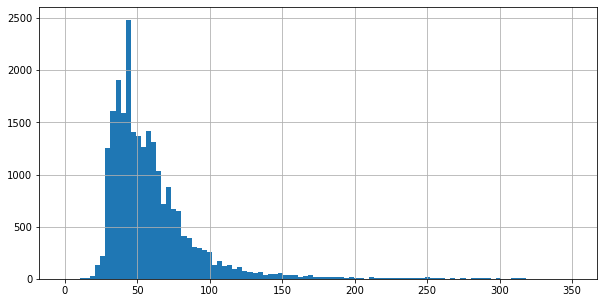

In [69]:
yandex_flats['total_area'].hist(bins=100, range=(0,350), grid=1, figsize=(10,5))


около 2,5 тысяч квартир 30-40 метров 
Все логично: это однокомнатные квартиры, которые являются самыми продаваемыми.
Это факт
Дальше пройдем по цене

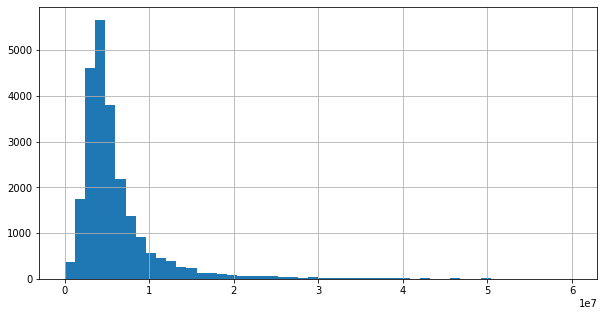

In [70]:
yandex_flats['last_price'].hist(bins=50, range=(0,60000000), figsize=(10,5))

Как видим, основная масса цен лежит в диапазоне 0 - 10,000,000 
Увеличим график

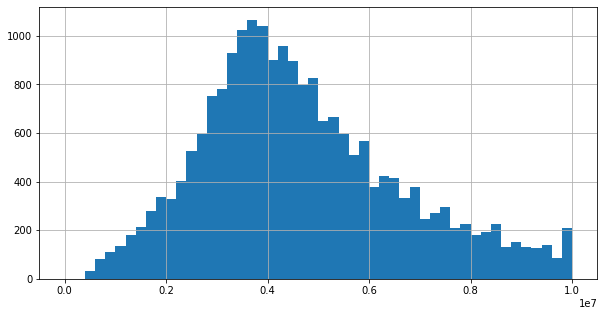

In [71]:
yandex_flats['last_price'].hist(bins=50, range=(0,10000000), figsize=(10,5))

В основной массе квартиры продаются в диапазоне от 20 до 60 млн. А точнее:

In [72]:
yandex_flats_sorted_1 = yandex_flats[(yandex_flats['last_price'] >= 3000000) & (yandex_flats['last_price'] <= 6800000)]
len(yandex_flats_sorted_1)

13867

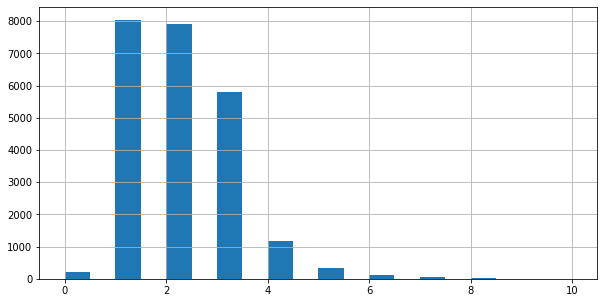

In [73]:
yandex_flats['rooms'].hist(bins=20, range=(0,10), grid=1, figsize=(10,5))

Для наглядности отделил друг от друга комнаты
Все логично 1- и 2-комнатные квартиры в большинстве своем
далее 3-х комнатные
а всех остальных совсем мало, что объяснимо. Не у всех, даже, найдутся знакомые с таким количеством комнат в квартире

In [74]:
yandex_flats_sorted_2 = yandex_flats_sorted_1[(yandex_flats_sorted_1['rooms'] >= 1) & (yandex_flats_sorted_1['rooms'] <= 3)]
len(yandex_flats_sorted_2)

13440

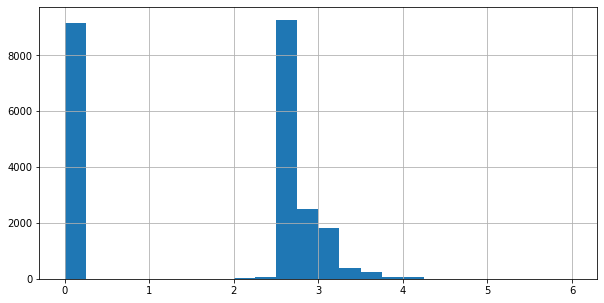

In [75]:
yandex_flats['ceiling_height'].hist(bins=24, range=(0,6), grid=1, figsize=(10,5))

Ну что, вот они и полезлии наши артефакты. Нули - незаполненные данные. Давайте убирать

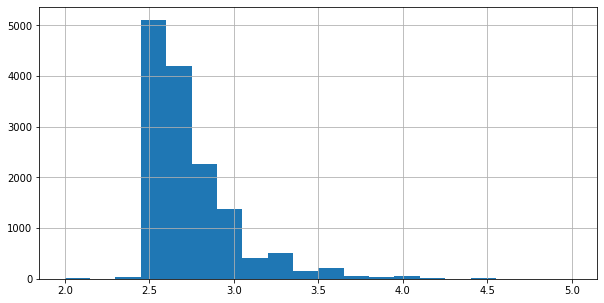

In [76]:
yandex_flats['ceiling_height'].hist(bins=20, range=(2,5), grid=1, figsize=(10,5))

Что и требовалось доказать:
2,5 метра - наибольшее число квартир
чем больше высота потолков, тем меньше будет квартир в продаже и тем дороже они будут становиться. Такова природа элистности.
В Китае ситуация была бы сантиметнов на 10 меньше, я думаю


In [77]:
yandex_flats_sorted_3 = yandex_flats_sorted_2[(yandex_flats_sorted_2['ceiling_height'] >= 1) & (yandex_flats_sorted_2['ceiling_height'] <= 3)]
len(yandex_flats_sorted_3)

7928

Пройдемся по времени продажи квартиры

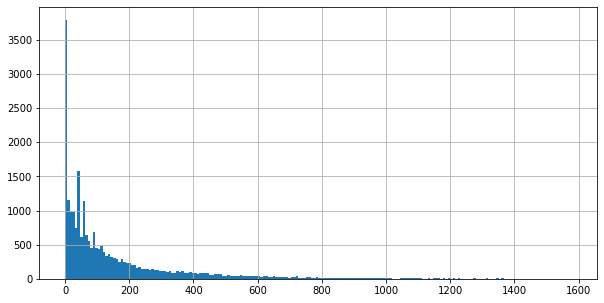

In [78]:
yandex_flats['days_exposition'].hist(bins=200, grid=1, figsize=(10,5))


На 0 дней всплеск. 
Это наши "-1" дней.
Опустим их

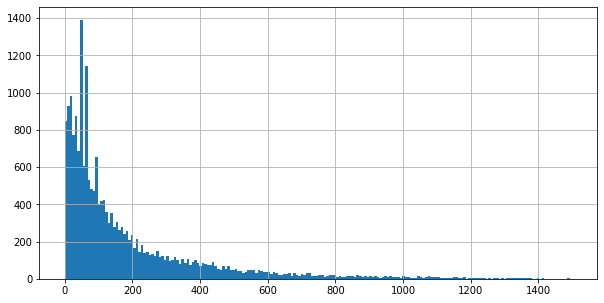

In [79]:
yandex_flats['days_exposition'].hist(bins=200, range=(0,1500), grid=1, figsize=(10,5))

Все почти закономерно, кроме 3х странных всплесков на 0-100 дней. Увеличим и посмотрим

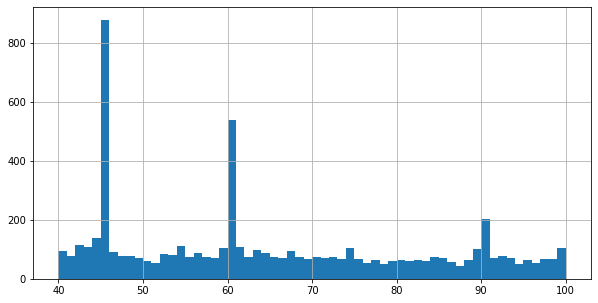

In [80]:
yandex_flats['days_exposition'].hist(bins=60, range=(40,100), grid=1, figsize=(10,5))

60 и 90 дней я еще могу как-то объяснить:
люди давали 2 и 3 месяца соответственно на продажу квартиры, а после отказывались ее продавать
Но что за взрыв на 45?

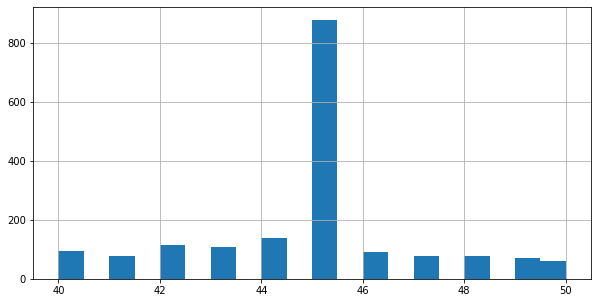

In [81]:
yandex_flats['days_exposition'].hist(bins=20, range=(40,50), grid=1, figsize=(10,5))

45 дней. Странно, но думаю, что при доскональном изучении работы Я.Недвижимости можно было бы найти логическое объяснение этим 3м всплескам
Давайте теперь просчитаем среднее и медиану

In [82]:
median_days_exposition = yandex_flats['days_exposition'].median()
print(median_days_exposition)
mean_days_exposition = yandex_flats['days_exposition'].mean()
print(mean_days_exposition)

73.0
156.31450317124737


В 2 раза!!!
Это, конечно, было предсказуемо, но не настолько.
Все почему, потому что много висяков, хозяева которых держат дикую цену пытаясь продать за неоправданную сумму

In [83]:
yandex_flats['days_exposition'].max()

1580

1580 дней квартира в продаже! Она успела подорожать, подешеветь и снова подоророжать!!!
Там уже могли люди рождаться и умирать!

На основе медианы, можно смело утверждать, что продажа квартиры должна занимать около 2,5 месяцев.
Если продавец сделал это быстрее, есть шанс, что он продешевил
Однако, если 2,5 месяца квартира в руках продавца и движения нет - снижайте цену!

Теперь будем бороться с выбросами. Для начала, пропишем функцию, которая будет считать усы по столбцу

In [84]:
def usi(row):
    a = row.describe()
    iqr_15 = 1.5*(a[6] - a[4])
    if a[3] >= a[4]-iqr_15:
        a_min = a[3]
    else:
        a_min = a[4]-iqr_15
    if a[7] <= a[6]+iqr_15:
        a_max = a[7]
    else:
        a_max = a[6]+iqr_15
    b = str(a_min)+' <= '+str(a.describe().name)+' <= '+str(a_max)
    return b

usi(yandex_flats['last_price'])   

'12190.0 <= last_price <= 11897500.0'

Теперь при помощи этой функции постепенно избавимся от выбросов по столбцам:

last_price                
total_area                
rooms                     
ceiling_height            


In [85]:
sorted_flats = yandex_flats.query(usi(yandex_flats['last_price']))
len(sorted_flats)

21595

In [86]:
sorted_flats = sorted_flats.query(usi(yandex_flats['total_area']))
len(sorted_flats)

21413

In [87]:
sorted_flats = sorted_flats.query(usi(yandex_flats['ceiling_height']))
len(sorted_flats)

21385

In [88]:
sorted_flats = sorted_flats.query(usi(yandex_flats['rooms']))
len(sorted_flats)

21385

21385 чистых значений без выбросов. Теперь, вроде, эта таблица считается чистой)

In [89]:
def compare(column):
    print(yandex_flats[column].describe().describe().name)
    print('Среднее было', yandex_flats[column].describe()[1], 'стало', sorted_flats[column].describe()[1])
    print('Медиана была', yandex_flats[column].describe()[5], 'стала', sorted_flats[column].describe()[5])
    print('Максимальное было', yandex_flats[column].describe()[7], 'стало', sorted_flats[column].describe()[7])
    
compare('last_price')

last_price
Среднее было 6541126.897928119 стало 4801865.87968202
Медиана была 4650000.0 стала 4400000.0
Максимальное было 763000000.0 стало 11894400.0


In [90]:
compare('rooms')

rooms
Среднее было 2.070105708245243 стало 1.9109656301145663
Медиана была 2.0 стала 2.0
Максимальное было 19.0 стало 6.0


In [91]:
compare('total_area')

total_area
Среднее было 60.32906934460889 стало 52.593718026654194
Медиана была 52.0 стала 49.0
Максимальное было 900.0 стало 114.2


In [92]:
compare('ceiling_height')

ceiling_height
Среднее было 1.69792600422833 стало 1.6229169978957214
Медиана была 2.5 стала 2.5
Максимальное было 100.0 стало 5.8


Значения передвинулись ближе к человеческим, исключив квартиры со 100-метровыми потолками, 19-ю комнатами, 900 квадратными метрами и практически миллиардной ценой

После того как мы убрали редкие и выбивающиеся значения переходим к следующей части:

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

Находить зависимость стоимость квартиры от различных факторов лучше при прочих равных. Если мы возьмем все квартиры и будем искать зависимость стоимости от удалености от центра квартир, может оказаться, что в выборке будут 10.000 квартир поселков и деревень с расстоянием от центра 1 км, а 1000 квартир на окраине Питера изменят статистику. Поэтому сразу буду искать топ 10 городов, а потом по ним буду изучать влияние факторов

In [93]:
sorted_flats.groupby('locality_name')['square_meter_rubl'].mean().sort_values()

locality_name
Старополье          11206.000000
Свирь               11481.000000
Вахнова Кара        11688.000000
Выскатка            12335.000000
Совхозный           12628.500000
                       ...      
Пушкин             100461.619048
Лисий Нос          100660.333333
Сестрорецк         101261.865031
Зеленогорск        102890.190476
Санкт-Петербург    105686.525975
Name: square_meter_rubl, Length: 303, dtype: float64

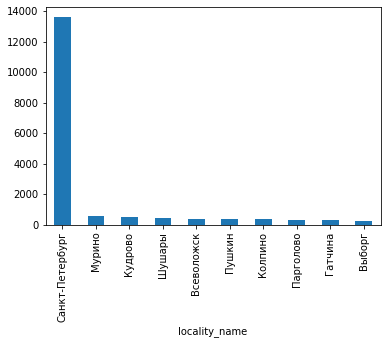

In [94]:
sorted_flats_sity = sorted_flats.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
sorted_flats_sity.plot(kind='bar')

Вот она десяточка. И кажется мне, самый правдивый показатель будет у Петебрурга, т.к. Питер в 100 раз больше.
Давайте тогда сразу посчитаемцену квадтаров и найдем самые дешевые и дорогие города

In [95]:
sorted_flats_spb = sorted_flats[sorted_flats['locality_name']=='Санкт-Петербург']
sorted_flats_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,ceiling_height_grouped,area_ratio,kitchen_area_ratio,square_meter_rubl,floor_grouped,weekday,month,year,last_price_1000
2,True,5196000,56.00,2015-08-20,2,0.00,5,34.300000,4,False,...,558,0.00,0.612500,0.148214,92785,Другое,3,8,2015,5196.0
4,True,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,121,3.00,0.320000,0.410000,100000,Другое,1,6,2018,10000.0
7,True,7915000,71.60,2019-04-18,2,0.00,24,41.886654,22,False,...,-1,0.00,0.585009,0.263966,110544,Другое,3,4,2019,7915.0
9,True,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,289,2.50,0.714754,0.106557,88524,Другое,6,2,2017,5400.0
10,True,5050000,39.60,2017-11-16,1,2.67,12,20.300000,3,False,...,137,2.65,0.512626,0.214646,127525,Другое,3,11,2017,5050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23639,True,9200000,101.00,2019-04-01,3,3.05,15,63.000000,12,False,...,23,3.00,0.623762,0.148515,91089,Другое,0,4,2019,9200.0
23640,True,3550000,35.30,2018-02-28,1,2.86,15,16.300000,4,False,...,29,2.85,0.461756,0.257790,100566,Другое,2,2,2018,3550.0
23641,True,5500000,52.00,2018-07-19,2,0.00,5,31.000000,2,False,...,15,0.00,0.596154,0.115385,105769,Другое,3,7,2018,5500.0
23642,True,9470000,72.90,2016-10-13,2,2.75,25,40.300000,7,False,...,519,2.75,0.552812,0.145405,129903,Другое,3,10,2016,9470.0


In [96]:
sorted_flats_spb.loc[:, 'cityCenters_nearest_km'] = sorted_flats_spb.loc[:, 'cityCenters_nearest']/1000
sorted_flats_spb.loc[:, 'cityCenters_nearest_km'] = sorted_flats_spb.loc[:, 'cityCenters_nearest_km'].astype('int')
sorted_flats_spb_grouped_1 = sorted_flats_spb.groupby('cityCenters_nearest_km')['square_meter_rubl'].mean()
sorted_flats_spb_grouped_1

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


cityCenters_nearest_km
-1     122301.292683
 0     123869.634146
 1     118616.943548
 2     114139.609890
 3     111143.833333
 4     120322.628253
 5     121463.794769
 6     119691.931034
 7     117947.737705
 8     112106.082721
 9     105709.951613
 10    106851.055288
 11    104272.249057
 12    106170.798301
 13    105902.607089
 14    103426.408460
 15    100747.409125
 16     98644.262465
 17     93483.911708
 18     93873.849398
 19     95082.518519
 20    107255.524390
 21     91007.015625
 22     88379.014815
 23     92720.233333
 24     82439.909091
 25     91135.600000
 26     75171.333333
 27     70312.000000
 28     81840.200000
 29     62481.666667
Name: square_meter_rubl, dtype: float64

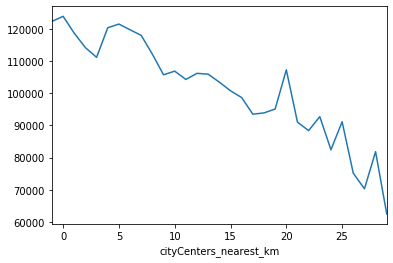

In [97]:
sorted_flats_spb_grouped_1.plot()

А вот и зависимость цен от отдаленности от центра. Чем дальше тем дешевле. Возникает вопрос, что там в питере в 20 км от центра? 
Может пересечение веток метро или какой-то дорогой комплекс)
А еще по графику можно предположить, что те, кто пропускал заполнение строки с отдаленностью от центра, продают квартиры +- в 10 км от центра)
Чуть изменим график для максимальной точности:

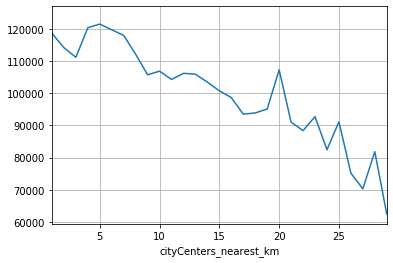

In [98]:
sorted_flats_spb_grouped_1.plot(xlim=(1,29), grid=1)

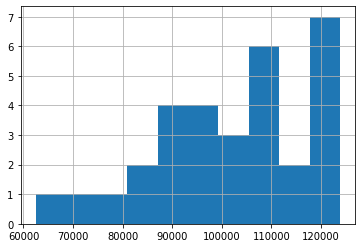

In [99]:
sorted_flats_spb_grouped_1.hist()

Вот теперь красота. Просадка на 27 км, но, думаю, питерцы бы объяснили)
Теперь найдем зависимость от числа комнат, хотя, по мне, это глупотсь еще та:
Чем больше комнат, тем больше площадь. Чем больше полощадь, тем дешевле метр

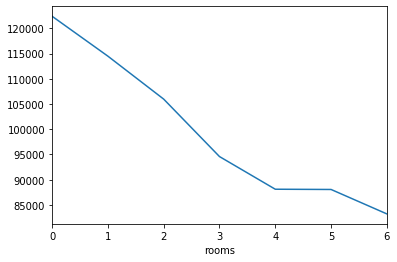

In [100]:
sorted_flats_spb_grouped_2 = sorted_flats_spb.groupby('rooms')['square_meter_rubl'].mean()
sorted_flats_spb_grouped_2.plot()

Ой, как неожиданно!!!! Сейчас построим цену исходя из квадрата, там вообще непонятно что!

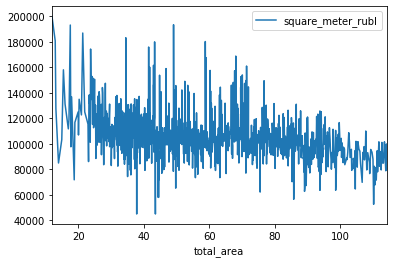

In [101]:
sorted_flats_spb_grouped_3 = sorted_flats_spb.pivot_table(index='total_area', values='square_meter_rubl', aggfunc='mean')
sorted_flats_spb_grouped_3.plot()

Чем больше площадь, тем дешевле метр, но это в среднем. Случаюстя квартиры побольше с ценой поменьше. Это райончик, соседи и ремонт)
А еще первый или последний этаж)
Но об этом мы пока не знаем... как будто

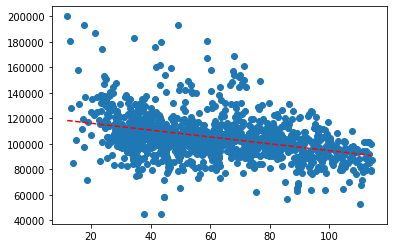

In [102]:
sorted_flats_spb_grouped_3 = sorted_flats_spb_grouped_3.reset_index()

import numpy as np
import matplotlib.pyplot as plt
x = sorted_flats_spb_grouped_3['total_area']
y = sorted_flats_spb_grouped_3['square_meter_rubl']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()


Или можно так. Тут очевиден факт снижения цены квадратного метра в зависимости от общей площади квартиры

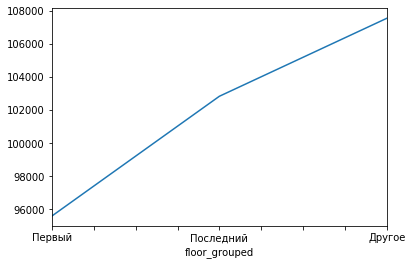

In [103]:
sorted_flats_spb_grouped_4 = sorted_flats_spb.groupby('floor_grouped')['square_meter_rubl'].mean()
sorted_flats_spb_grouped_4.sort_values().plot()

Ну вот доказательства. Никто не хочет жить на первом этаже - все заглядывают в окна, а если еще окна во двор, все будут в курсе твоей личной жизни
На очереди проверка по дню, месяцу и году

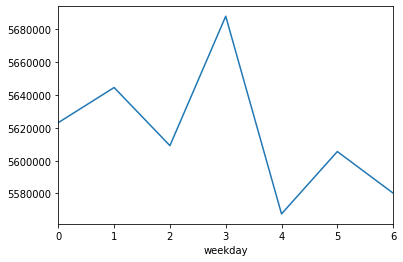

In [104]:
sorted_flats_spb_grouped_5 = sorted_flats_spb.groupby('weekday')['last_price'].mean()
sorted_flats_spb_grouped_5.plot()

Хм. Выставляющие квартиру в среду хотят за свои метры больше, чем другие. Да, если бы не одно "но". 
Больше они хотят на 100 тысяч, что меньше 2х процентов. Такое себе подтверждение. Хотя, как и с последним этажем. 
Смотрим месяцы

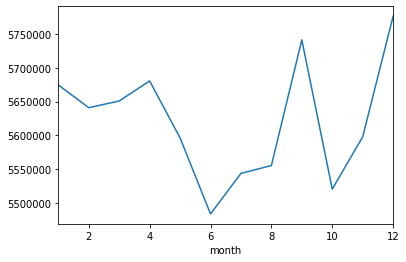

In [105]:
sorted_flats_spb_grouped_6 = sorted_flats_spb.groupby('month')['last_price'].mean()
sorted_flats_spb_grouped_6.plot()

Ну что сказать. Практически типичный график для продаж квартир. 
В мае съезжают студенты и начинается обвал цен, в сентябре он максимальный и после, в октябре начинает проседать после пика. 
Далее к НГ все стараются купить квартиру, что провоцирует рост цен
Предсказываю рост цен по годам

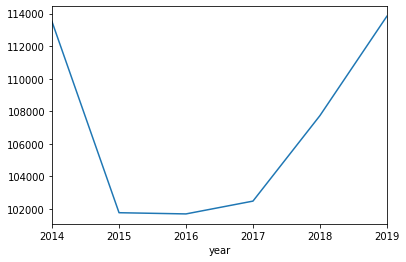

In [106]:
sorted_flats_spb_grouped_7 = sorted_flats_spb.groupby('year')['square_meter_rubl'].mean()
sorted_flats_spb_grouped_7.plot()

О да, кризис 2014!!! сколько судеб он поломал и бизнесов попортил!
Если Практикум оставит это щадание на следубщие 2 года и увеличит датасет, будет весело)))
Дожиьт бы.
Теперь выясним, какая область входит в центр

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

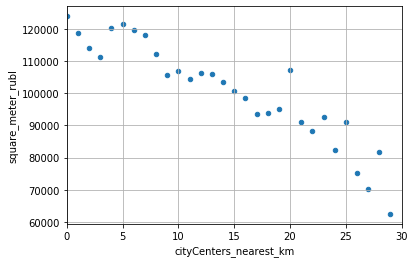

In [107]:
sorted_flats_spb_grouped_8 = sorted_flats_spb.pivot_table(index='cityCenters_nearest_km', values='square_meter_rubl', aggfunc='mean')
sorted_flats_spb_grouped_8 = sorted_flats_spb_grouped_8.reset_index()
sorted_flats_spb_grouped_8.plot(kind='scatter', x='cityCenters_nearest_km', y='square_meter_rubl', xlim=(0,30), grid=1)

По этому графику, я должен определить центральную зону. 
Однако для того, чтобы сравнение было корректным, необходимо избавиться от других важных факторов в формировании цены - 
количества комнат и этажности. 
Т.к. есть шанс, что в какой-нибудь из категорий эти факторы будут превалировать

In [108]:
sorted_flats_spb.groupby('rooms')['rooms'].count()

rooms
0     108
1    4891
2    4768
3    3253
4     525
5      42
6       3
Name: rooms, dtype: int64

Берем однокомнатные и не первый и не последний этаж

In [109]:
sorted_flats_spb_2 = sorted_flats_spb[(sorted_flats_spb['rooms']==2)&(sorted_flats_spb['floor_grouped']=='Другое')]
sorted_flats_spb_2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ceiling_height_grouped,area_ratio,kitchen_area_ratio,square_meter_rubl,floor_grouped,weekday,month,year,last_price_1000,cityCenters_nearest_km
2,True,5196000,56.00,2015-08-20,2,0.00,5,34.300000,4,False,...,0.00,0.612500,0.148214,92785,Другое,3,8,2015,5196.0,13
4,True,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,3.00,0.320000,0.410000,100000,Другое,1,6,2018,10000.0,8
7,True,7915000,71.60,2019-04-18,2,0.00,24,41.886654,22,False,...,0.00,0.585009,0.263966,110544,Другое,3,4,2019,7915.0,11
25,True,6800000,76.00,2015-10-01,2,2.75,23,39.000000,18,False,...,2.75,0.513158,0.197368,89473,Другое,3,10,2015,6800.0,14
31,True,7200000,67.90,2017-10-26,2,2.80,16,38.100000,4,False,...,2.80,0.561119,0.197349,106038,Другое,3,10,2017,7200.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23619,True,6000000,47.00,2018-03-16,2,3.00,5,27.000000,4,False,...,3.00,0.574468,0.191489,127659,Другое,4,3,2018,6000.0,9
23632,True,5250000,43.00,2018-05-11,2,2.50,5,29.000000,2,False,...,2.50,0.674419,0.139535,122093,Другое,4,5,2018,5250.0,7
23641,True,5500000,52.00,2018-07-19,2,0.00,5,31.000000,2,False,...,0.00,0.596154,0.115385,105769,Другое,3,7,2018,5500.0,6
23642,True,9470000,72.90,2016-10-13,2,2.75,25,40.300000,7,False,...,2.75,0.552812,0.145405,129903,Другое,3,10,2016,9470.0,4


Вот по этой таблице можно точно определить центр Питера, детка

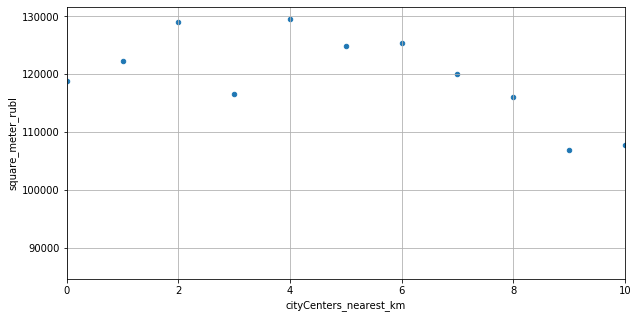

In [110]:
sorted_flats_spb_grouped_final = sorted_flats_spb_2.pivot_table(index='cityCenters_nearest_km', values='square_meter_rubl', aggfunc='mean')
sorted_flats_spb_grouped_final = sorted_flats_spb_grouped_final.reset_index()
sorted_flats_spb_grouped_final.plot(kind='scatter', x='cityCenters_nearest_km', y='square_meter_rubl', xlim=(0,10), grid=1, figsize=(10,5))

Судя по тому, что на 3-м килоометре просадка, а 8й километр продается по той же цене, что и третий и после 8 идет резкий спуск, 
можно резюмировать о радиусе центра Питера в 8 км
Только проверю это на двхкомнатных квартирах.

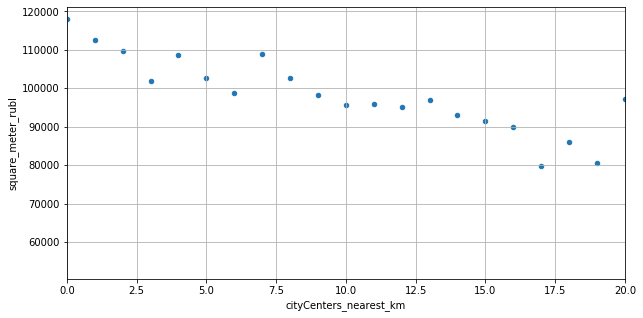

In [111]:
sorted_flats_spb_3 = sorted_flats_spb[(sorted_flats_spb['rooms']==3)&(sorted_flats_spb['floor_grouped']=='Другое')]
sorted_flats_spb_grouped_final3 = sorted_flats_spb_3.pivot_table(index='cityCenters_nearest_km', values='square_meter_rubl', aggfunc='mean')
sorted_flats_spb_grouped_final3 = sorted_flats_spb_grouped_final3.reset_index()
sorted_flats_spb_grouped_final3.plot(kind='scatter', x='cityCenters_nearest_km', y='square_meter_rubl', xlim=(0,20), grid=1, figsize=(10,5))

Ну да, практически та же история
8 км - а дальше замкадыши)

Выделите сегмент квартир в центре. 

Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 

Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

Сделайте выводы. 

Отличаются ли они от общих выводов по всему городу?

In [112]:
sorted_flats_spb_centr = sorted_flats_spb.query('cityCenters_nearest_km < 9 & cityCenters_nearest_km > 0 & ceiling_height > 0')
sorted_flats_spb_centr

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ceiling_height_grouped,area_ratio,kitchen_area_ratio,square_meter_rubl,floor_grouped,weekday,month,year,last_price_1000,cityCenters_nearest_km
4,True,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,3.00,0.320000,0.410000,100000,Другое,1,6,2018,10000.0,8
94,True,3500000,29.5,2019-04-26,1,2.50,5,15.6,2,False,...,2.50,0.528814,0.186441,118644,Другое,4,4,2019,3500.0,7
114,True,4000000,21.4,2019-02-07,1,2.90,8,8.3,7,False,...,2.90,0.387850,0.294393,186915,Другое,3,2,2019,4000.0,5
136,True,6500000,51.8,2018-08-01,2,3.45,6,25.6,2,False,...,3.40,0.494208,0.140927,125482,Другое,2,8,2018,6500.0,3
143,True,2990000,30.0,2016-06-08,1,2.50,9,20.0,9,False,...,2.50,0.666667,0.186667,99666,Последний,2,6,2016,2990.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23595,True,4990000,62.5,2018-04-26,2,2.70,4,32.3,4,False,...,2.70,0.516800,0.193600,79840,Последний,3,4,2018,4990.0,4
23599,True,10100000,78.0,2017-05-12,3,3.27,5,48.6,5,False,...,3.20,0.623077,0.105128,129487,Последний,4,5,2017,10100.0,1
23615,True,9000000,110.0,2015-12-10,4,3.36,7,64.6,5,False,...,3.30,0.587273,0.143636,81818,Другое,3,12,2015,9000.0,5
23632,True,5250000,43.0,2018-05-11,2,2.50,5,29.0,2,False,...,2.50,0.674419,0.139535,122093,Другое,4,5,2018,5250.0,7


In [113]:
print('Средняя площадь {:.2f} кв.м' .format(sorted_flats_spb_centr['total_area'].mean()))
print('Средняя цена {:.0f} млн' .format(sorted_flats_spb_centr['last_price'].mean()/1000000))
print('Средняя высота {:.2f} м ' .format(sorted_flats_spb_centr['ceiling_height'].mean()))
print('Среднее число комнат {:.2f}' .format(sorted_flats_spb_centr['rooms'].mean()))


Средняя площадь 63.26 кв.м
Средняя цена 7 млн
Средняя высота 2.96 м 
Среднее число комнат 2.26


AxesSubplot(0.125,0.125;0.775x0.755)


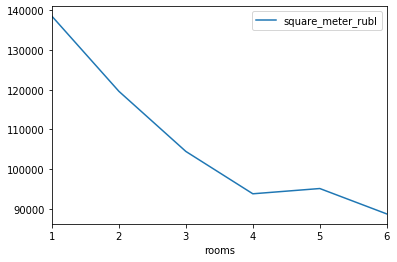

In [114]:
centr_grouped_room = sorted_flats_spb_centr.pivot_table(index='rooms', values='square_meter_rubl', aggfunc='mean')
print(centr_grouped_room.plot(xlim=(1,6)))

Что-то с пятикомнатными квартирами в центре, но колебания слишком малы, а вообще, все как во всем городе

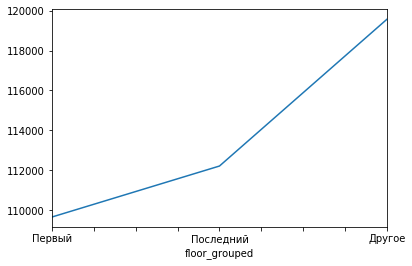

In [115]:
centr_grouped_floor = sorted_flats_spb_centr.groupby('floor_grouped')['square_meter_rubl'].mean()
centr_grouped_floor.sort_values().plot()

И тут все по-прежнему

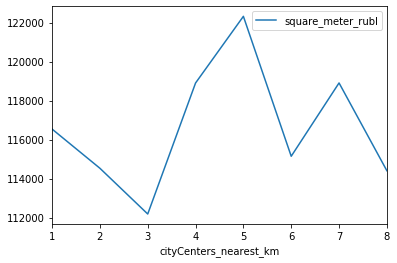

In [116]:
centr_grouped_distance = sorted_flats_spb_centr.pivot_table(index='cityCenters_nearest_km', values='square_meter_rubl', aggfunc='mean')
centr_grouped_distance.plot()

Я не буду врать, мыслей по этим горкам у меня нет - я не житель Питера.


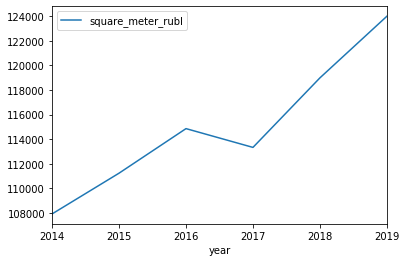

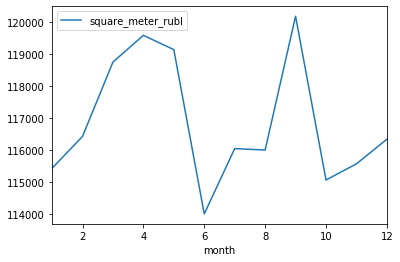

In [117]:
centr_grouped_year = sorted_flats_spb_centr.pivot_table(index='year', values='square_meter_rubl', aggfunc='mean')
centr_grouped_year.plot()
centr_grouped_month = sorted_flats_spb_centr.pivot_table(index='month', values='square_meter_rubl', aggfunc='mean')
centr_grouped_month.plot()

In [118]:
centr_grouped_year.max()/centr_grouped_year.min()

square_meter_rubl    1.148865
dtype: float64

rПо месяцам все просто - июнь и октябрь - месяцы просадки
А вот по годам... Очень интересно. Как видно на графике, с каждым годом жилье в Питере все дорожает и дорожает
с 16 по 17 год мы видим снижение стоимости, но, вероятнее всего это обучловлено тем, что кризис 14 года сказался на продавцах квартир в центре позже

### Шаг 5. Общий вывод

In [ ]:
Цены на квартиры зависят от цены квадратного метра и площади, в первую очередь
Цена квадратного метра, в свою очередь, зависит от многих факторов: 
    этажности, общай площади, города, расстояния от центра, года и месяца подачи объявления
Совокупность всех этих факторов и формирует цену
В среднем, срок продажи объекта составляет 2,5 месяца, однако, если есть желание избавиться от квартиры быстрее, 
    необходимо изменять стоимость в меньшую сторону.
Рынок недвижимости в 2014 году потерпел обвал, однако это не сказалось на жилье в центре Питера слабо и со смещением на 2 года
Как показало исследование, стоимость квартиры в питере за 5 лет увеличилась на 14%, что при сдаче в аренду является дополнительным доходом
Однако учитывая падение курса рубля за этот срок на 50% выгода становится сомнительной

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод info())
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [ ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [ ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [ ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [ ]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [ ]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [ ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод